In [71]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Lab 2 - Classification

## Data import

In [73]:
df = pd.read_csv("data.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## N/A handling

In [75]:
df.fillna(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Visualization

<AxesSubplot:>

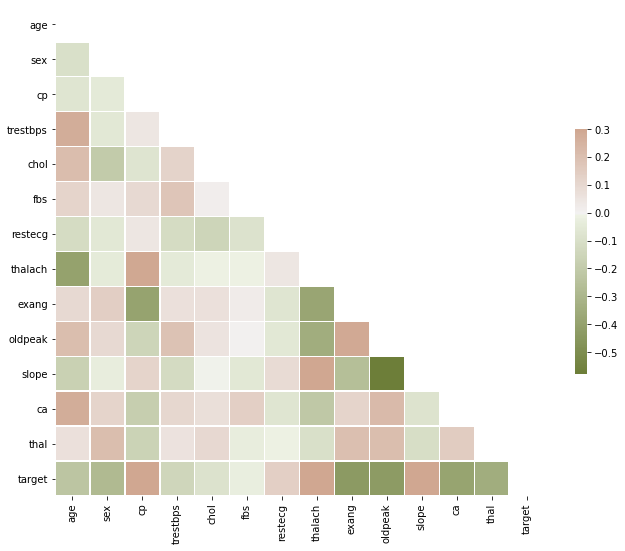

In [76]:
f, ax = plt.subplots(figsize=(11, 9))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

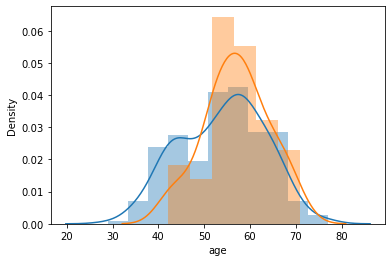

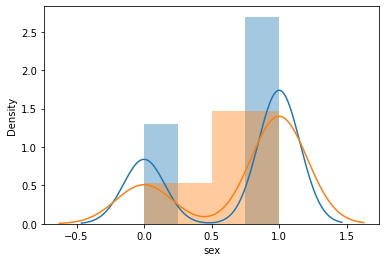

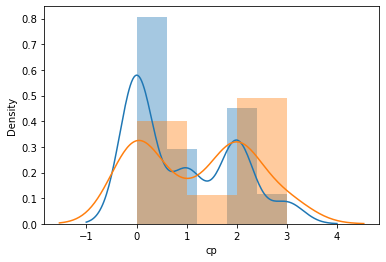

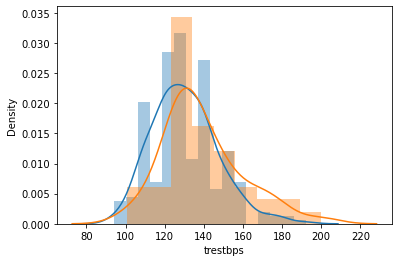

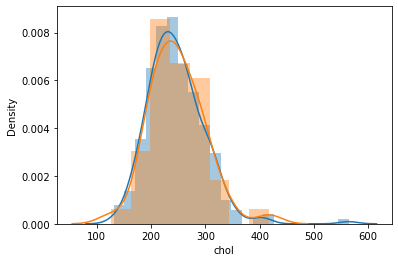

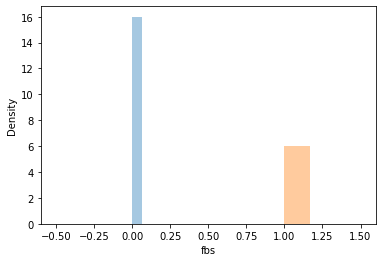

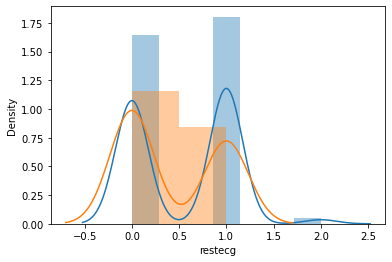

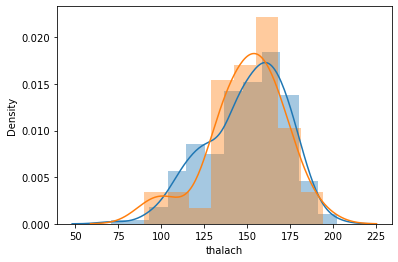

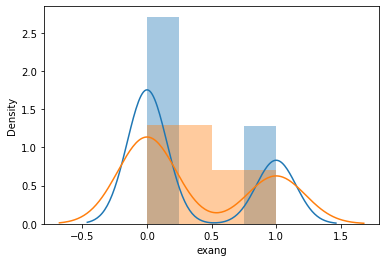

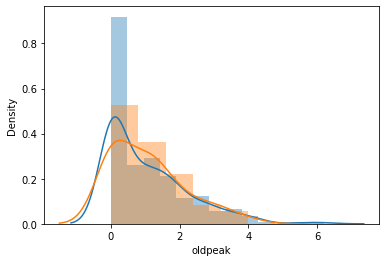

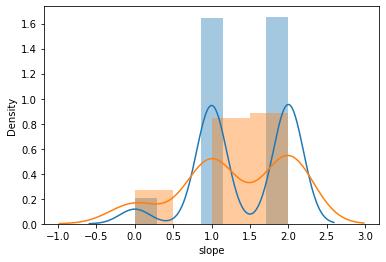

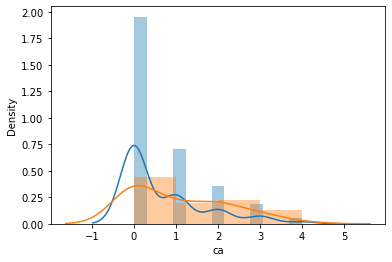

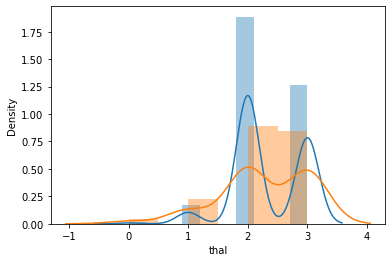

<Figure size 432x288 with 0 Axes>

In [77]:
import warnings
warnings.filterwarnings('ignore')

cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal', 'target']
for column in cols[:-1]:
    for i in [0,1]:
        
        x = df[column][df["fbs"] == i]
        sns.distplot(x)
    plt.figure()

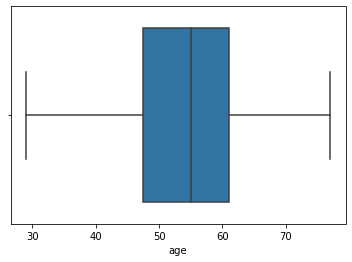

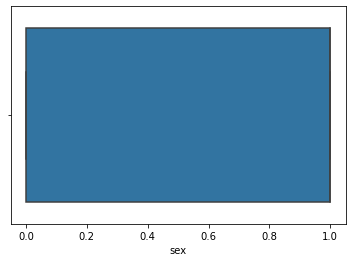

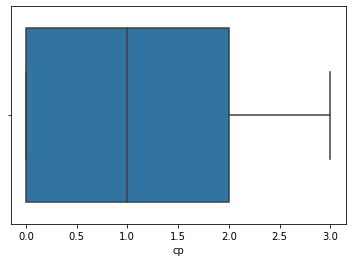

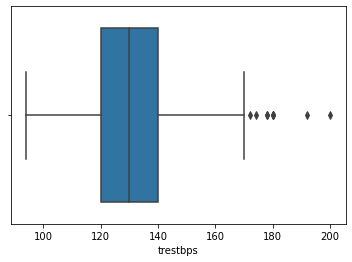

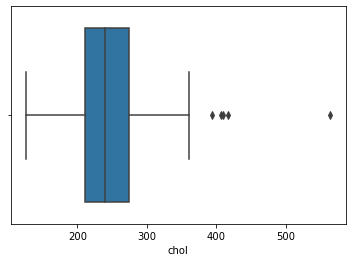

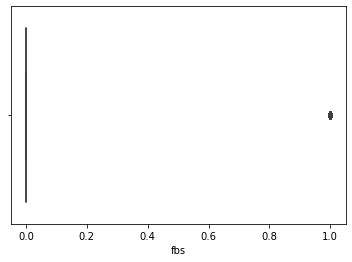

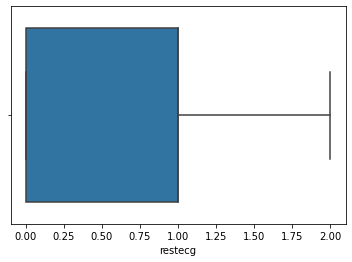

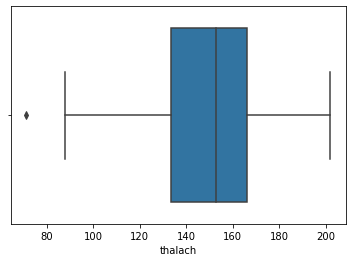

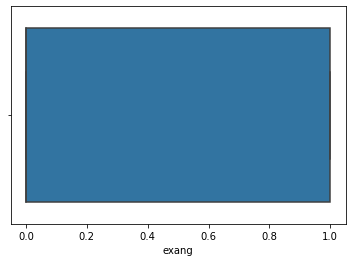

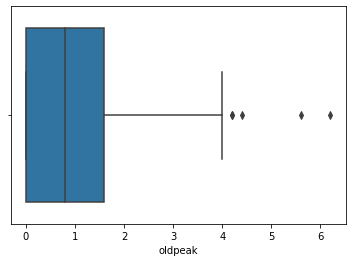

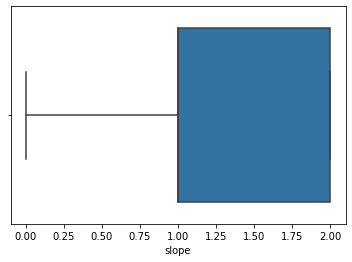

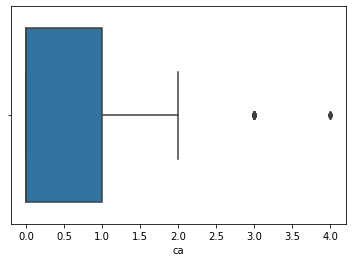

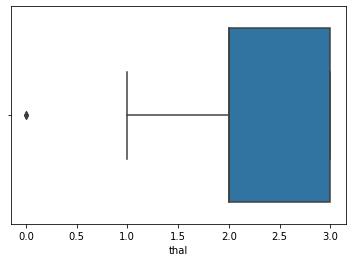

<Figure size 432x288 with 0 Axes>

In [78]:
for column in cols[:-1]:
    sns.boxplot(df[column])
    plt.figure()

### Normalization

In [79]:
for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


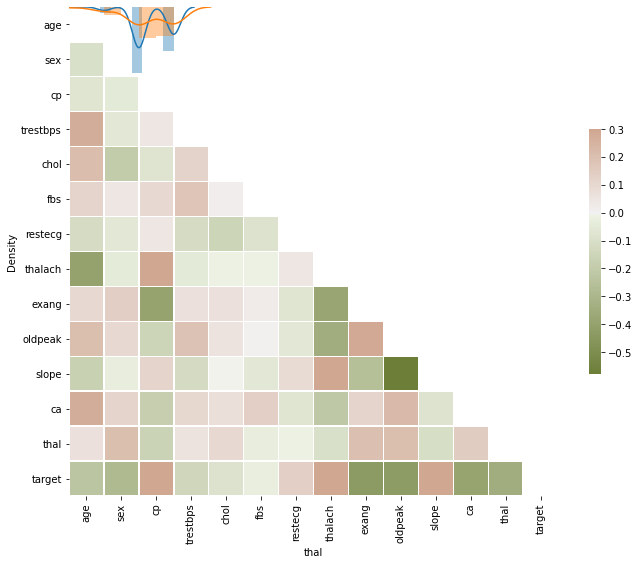

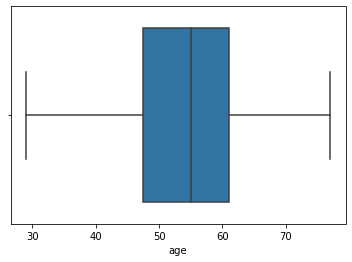

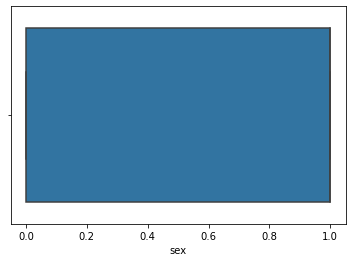

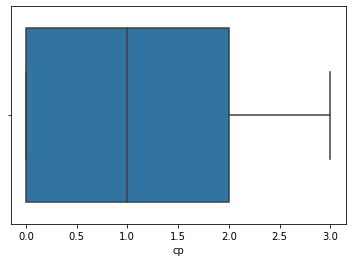

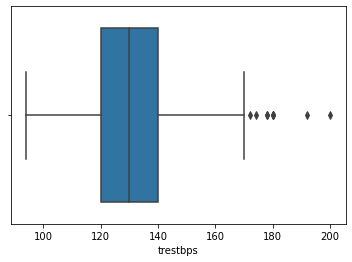

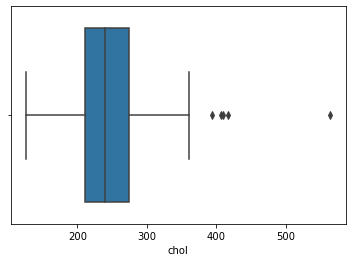

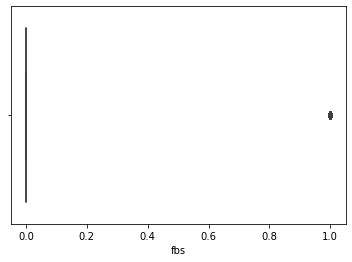

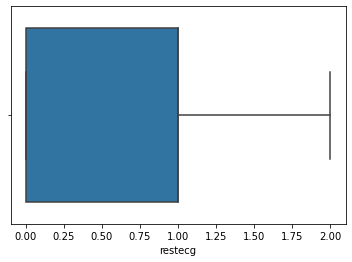

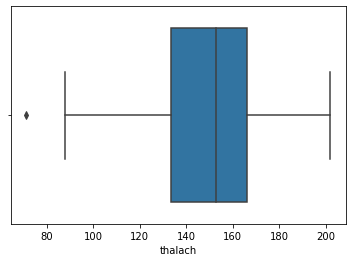

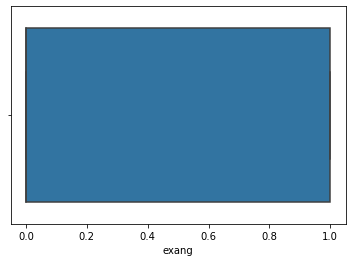

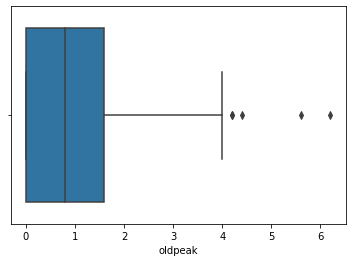

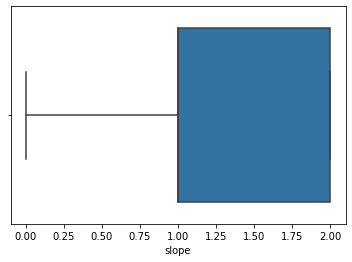

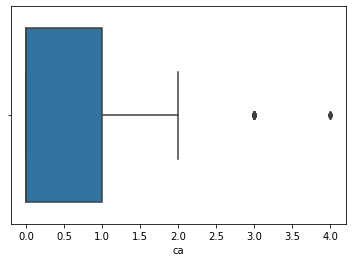

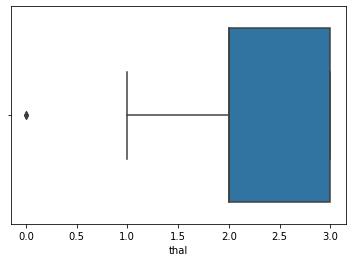

<Figure size 432x288 with 0 Axes>

In [85]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Lab 2 - Classification

## Data import

df = pd.read_csv("data.csv", delimiter=',')
df.info()

df.head()

## N/A handling

df.fillna(0)

## Visualization

f, ax = plt.subplots(figsize=(11, 9))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

import warnings
warnings.filterwarnings('ignore')

cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal', 'target']
        
for i in [0,1]:    
    x = df[column][df["fbs"] == i]
    sns.distplot(x)
plt.figure()

for column in cols[:-1]:
    sns.boxplot(df[column])
    plt.figure()

### Normalization

for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()





##p2

In [86]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Data import

In [88]:
df = pd.read_csv("data.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## N/A handling

In [90]:
df.fillna(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Classification

In [91]:
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

num_samples = X.shape[0]
train_samples = int(0.8*num_samples)
indexes = np.arange(num_samples)
random.shuffle(indexes)

X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### KNN - Classifier

<AxesSubplot:xlabel='k_neighbores', ylabel='f1_scores'>

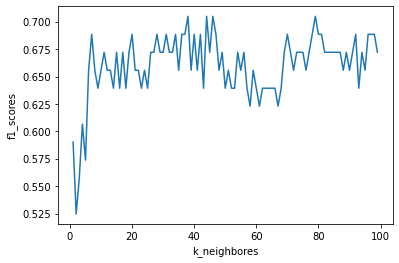

In [94]:
scores = list()
neighbors = list()

for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_predict = neigh.predict(X_test)
    _score = f1_score(Y_predict, Y_test, average="micro")
    scores.append(_score)
    neighbors.append(i)
    
df = pd.DataFrame({"f1_scores": scores, "k_neighbores": neighbors})
sns.lineplot(y="f1_scores", x="k_neighbores", data=df)

In [95]:
##p3

In [96]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [97]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Data import

In [98]:
df = pd.read_csv("data.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## N/A handling

In [100]:
df.fillna(1.0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---

In [102]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))

Confusion matrix SVC linear :
[[18  8]
 [10 25]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.64      0.69      0.67        26
     class 1       0.76      0.71      0.74        35

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.71      0.70      0.71        61



In [103]:
##p4

In [104]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Data import

In [106]:
df = pd.read_csv("data.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## N/A handling

In [108]:
df.fillna(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---

### Linear

In [109]:
parameters = {'C': [1, 10, 100, 1000]}
neigh = SVC(kernel='linear')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC linear :
[[20  6]
 [ 4 31]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.83      0.77      0.80        26
     class 1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

{'C': 10}


### RBF

In [110]:
parameters = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.1, 1]}
neigh = SVC(kernel='rbf')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC rbf :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC rbf :
[[10 16]
 [10 25]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.50      0.38      0.43        26
     class 1       0.61      0.71      0.66        35

    accuracy                           0.57        61
   macro avg       0.55      0.55      0.55        61
weighted avg       0.56      0.57      0.56        61

{'C': 100, 'gamma': 0.001}


In [111]:
##p5

In [112]:
import random
import sys

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Data import

In [114]:
df = pd.read_csv("data.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## N/A handling

In [116]:
df.fillna(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Visualization

<AxesSubplot:>

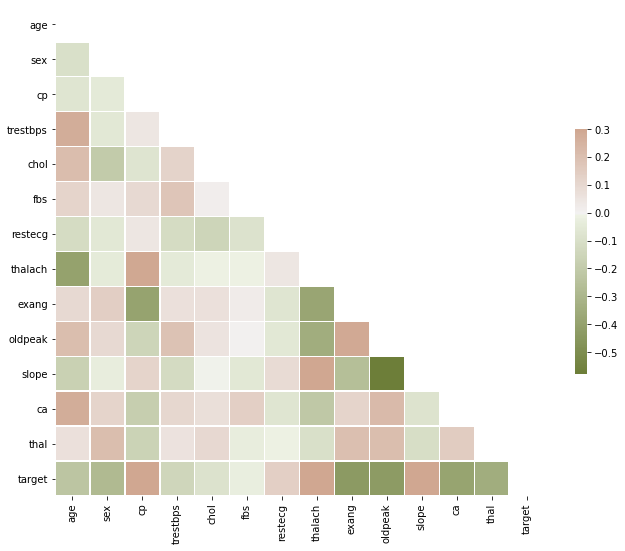

In [118]:
f, ax = plt.subplots(figsize=(11, 9))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

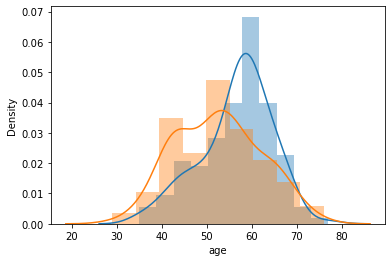

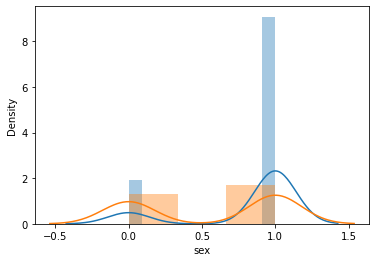

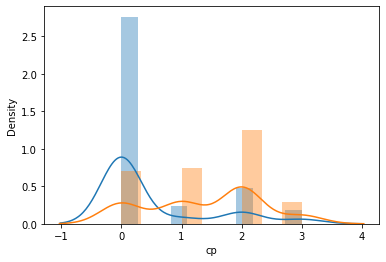

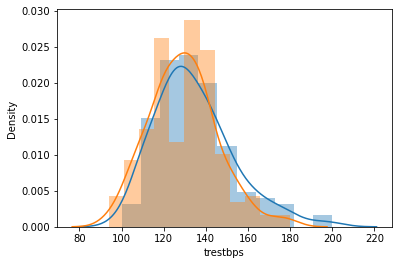

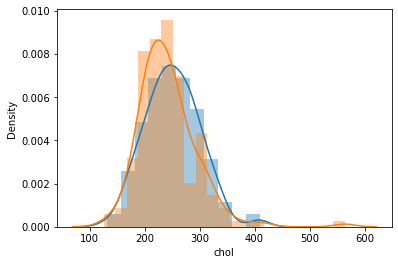

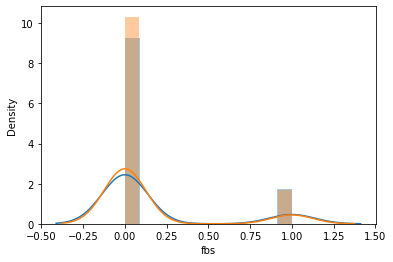

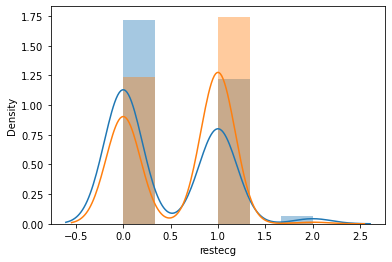

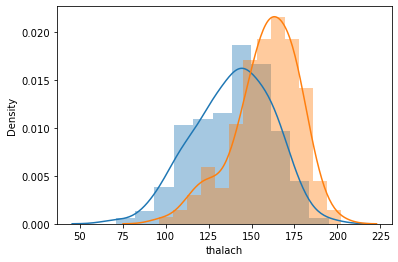

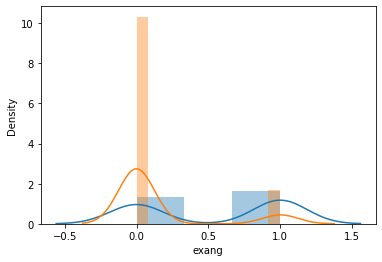

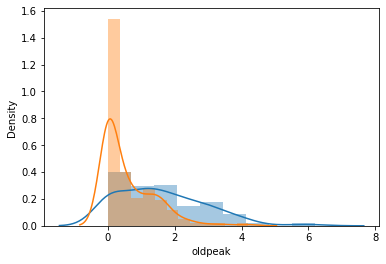

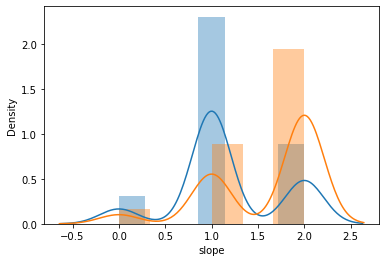

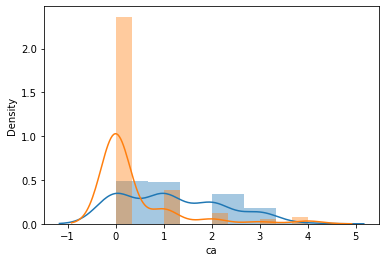

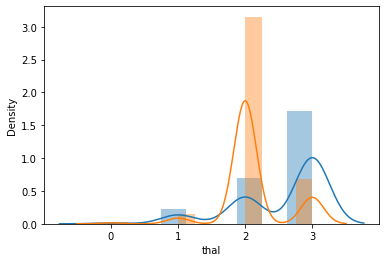

<Figure size 432x288 with 0 Axes>

In [119]:
import warnings
warnings.filterwarnings('ignore')

cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal', 'target']
for column in cols[:-1]:
    for i in [0,1]:
        
        x = df[column][df["target"] == i]
        sns.distplot(x)
    plt.figure()

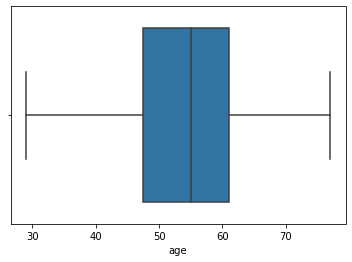

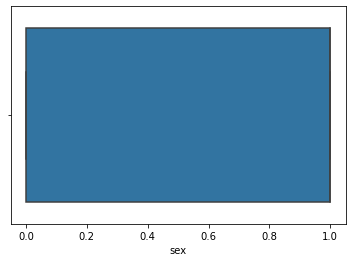

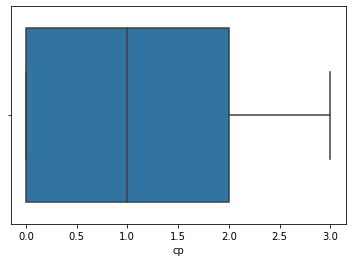

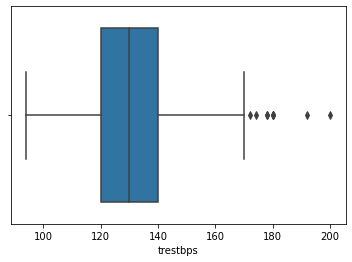

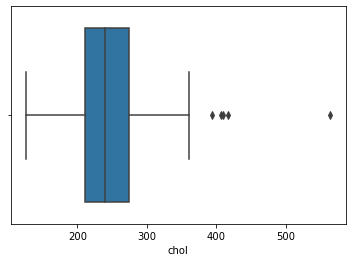

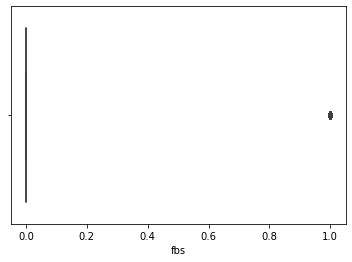

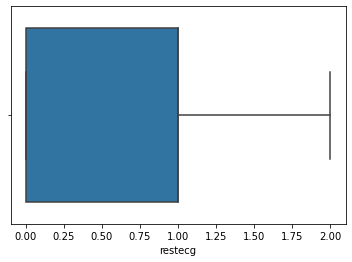

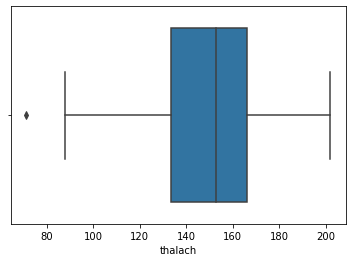

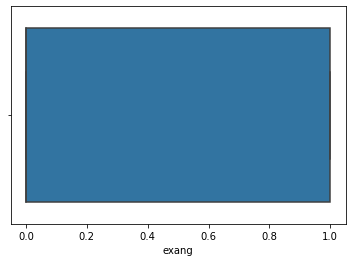

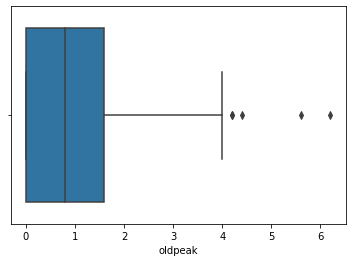

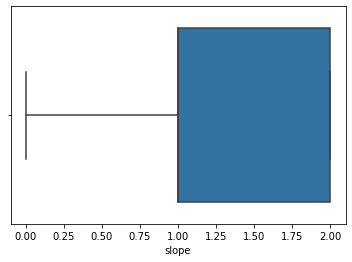

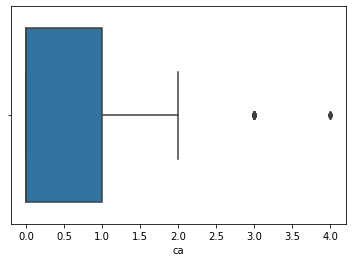

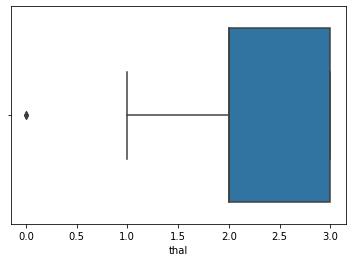

<Figure size 432x288 with 0 Axes>

In [120]:
for column in cols[:-1]:
    sns.boxplot(df[column])
    plt.figure()

### Normalization

In [121]:
for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

---

# Classification

In [122]:
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

num_samples = X.shape[0]
train_samples = int(0.8*num_samples)
indexes = np.arange(num_samples)
random.shuffle(indexes)

X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### KNN - Classifier

<AxesSubplot:xlabel='k_neighbores', ylabel='f1_scores'>

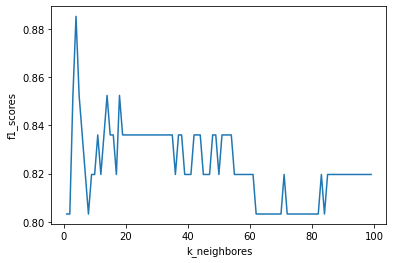

In [123]:
scores = list()
neighbors = list()

for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_predict = neigh.predict(X_test)
    _score = f1_score(Y_predict, Y_test, average="micro")
    scores.append(_score)
    neighbors.append(i)
    
df = pd.DataFrame({"f1_scores": scores, "k_neighbores": neighbors})
sns.lineplot(y="f1_scores", x="k_neighbores", data=df)

---

## Decision Tree - Classifier

In [124]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))

Confusion matrix SVC linear :
[[15 11]
 [ 5 30]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.75      0.58      0.65        26
     class 1       0.73      0.86      0.79        35

    accuracy                           0.74        61
   macro avg       0.74      0.72      0.72        61
weighted avg       0.74      0.74      0.73        61



---

### Linear

In [125]:
parameters = {'C': [1, 10, 100, 1000]}
neigh = SVC(kernel='linear')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC linear :
[[20  6]
 [ 3 32]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.87      0.77      0.82        26
     class 1       0.84      0.91      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

{'C': 1}


### RBF

In [126]:
parameters = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.1, 1]}
neigh = SVC(kernel='rbf')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC rbf :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC rbf :
[[18  8]
 [ 2 33]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.90      0.69      0.78        26
     class 1       0.80      0.94      0.87        35

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61

{'C': 10, 'gamma': 0.001}


---

## Random forest

In [127]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90]}
neigh = RandomForestClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix Random Forest :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report Random Forest :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix Random Forest :
[[17  9]
 [ 2 33]]
Classification report Random Forest :
              precision    recall  f1-score   support

     class 0       0.89      0.65      0.76        26
     class 1       0.79      0.94      0.86        35

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61

{'n_estimators': 80}


## Adaboost

In [128]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = AdaBoostClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix AdaBoost :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report AdaBoost :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix AdaBoost :
[[19  7]
 [ 2 33]]
Classification report AdaBoost :
              precision    recall  f1-score   support

     class 0       0.90      0.73      0.81        26
     class 1       0.82      0.94      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.84        61
weighted avg       0.86      0.85      0.85        61

{'learning_rate': 0.5, 'n_estimators': 5}


## Gradient boost

In [129]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = GradientBoostingClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix Gradient Boosting :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report Gradient Boosting :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix Gradient Boosting :
[[15 11]
 [ 4 31]]
Classification report Gradient Boosting :
              precision    recall  f1-score   support

     class 0       0.79      0.58      0.67        26
     class 1       0.74      0.89      0.81        35

    accuracy                           0.75        61
   macro avg       0.76      0.73      0.74        61
weighted avg       0.76      0.75      0.75        61

{'learning_rate': 0.01, 'n_estimators': 80}
